In [1]:
%load_ext autoreload
%autoreload 2
from glob import glob
import os
from pathlib import Path
import re
import sys
import yaml
import datetime
import numpy as np
import pandas as pd
from tqdm import tqdm
from func.utils import get_categorical_features, read_pkl_gzip, to_pkl_gzip, parallel_load_data, get_filename, logger_func
from ieee_train import eval_train, eval_check_feature
from kaggle_utils import reduce_mem_usage, move_feature
logger = logger_func()

2019-09-12 12:28:22,224 func.utils 347 [INFO]    [logger_func] start 


In [2]:
COLUMN_ID = 'TransactionID'
COLUMN_DT = 'TransactionDT'
COLUMN_TARGET = 'isFraud'
COLUMN_GROUP = 'DT-M'
COLUMNS_IGNORE = [COLUMN_ID, COLUMN_DT, COLUMN_TARGET, COLUMN_GROUP, 'is_train', 'date']

def filter_feature(path):
    if path.count(''):
        return True
    else:
        return False

paths_train = glob('../feature/raw_use/*_train.gz')
paths_train = [path for path in paths_train if filter_feature(path) ]
paths_test = glob('../feature/raw_use/*_test.gz')
paths_test = [path for path in paths_test if filter_feature(path) ]

paths_train_feature = sorted(glob('../feature/org_use/*_train.gz'))
paths_test_feature  = sorted(glob('../feature/org_use/*_test.gz'))

paths_train_feature += sorted(glob('../feature/valid/*_train.gz'))
paths_test_feature  += sorted(glob('../feature/valid/*_test.gz'))

paths_train_feature += sorted(glob('../feature/kernel/*_train.gz'))
paths_test_feature  += sorted(glob('../feature/kernel/*_test.gz'))

# paths_train_feature += sorted(glob('../feature/valid_use/*_train.gz'))
# paths_test_feature  += sorted(glob('../feature/valid_use/*_test.gz'))

# df_train = reduce_mem_usage( parallel_load_data(paths_train) )
# df_test  = reduce_mem_usage( parallel_load_data(paths_test) )
df_train = parallel_load_data(paths_train)
df_test  = parallel_load_data(paths_test)
Y = df_train[COLUMN_TARGET]
df_train.drop(COLUMN_TARGET, axis=1, inplace=True)

  1%|          | 6/1125 [00:00<00:18, 59.35it/s]

* Check Unique Feature.


100%|██████████| 1125/1125 [00:15<00:00, 74.59it/s]


All Features have info.
  * Diff Features: 0
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.893816
[400]	valid_0's auc: 0.906848
[600]	valid_0's auc: 0.912879
[800]	valid_0's auc: 0.916506
[1000]	valid_0's auc: 0.917936
[1200]	valid_0's auc: 0.918863
[1400]	valid_0's auc: 0.919236
[1600]	valid_0's auc: 0.919541
[1800]	valid_0's auc: 0.9199
[2000]	valid_0's auc: 0.920258
[2200]	valid_0's auc: 0.920585
Early stopping, best iteration is:
[2202]	valid_0's auc: 0.920615


2019-09-12 12:55:10,354 func.utils 111 [INFO]    [ieee_cv]   * Fold0 2017-12: 0.9206145826713095 


[  * Fold0 Validation-DT-M 2017-12: 134339] done in 1547 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.925057
[400]	valid_0's auc: 0.938981
[600]	valid_0's auc: 0.944829
[800]	valid_0's auc: 0.946904
[1000]	valid_0's auc: 0.947901
[1200]	valid_0's auc: 0.948362
[1400]	valid_0's auc: 0.948769
[1600]	valid_0's auc: 0.948868
Early stopping, best iteration is:
[1668]	valid_0's auc: 0.948917


2019-09-12 13:02:52,783 func.utils 111 [INFO]    [ieee_cv]   * Fold1 2018-3: 0.94891658301877 


[  * Fold1 Validation-DT-M 2018-3: 101968] done in 457 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.929664
[400]	valid_0's auc: 0.942358
[600]	valid_0's auc: 0.94715
[800]	valid_0's auc: 0.949432
[1000]	valid_0's auc: 0.950276
[1200]	valid_0's auc: 0.950839
[1400]	valid_0's auc: 0.951318
Early stopping, best iteration is:
[1459]	valid_0's auc: 0.951467


2019-09-12 13:09:22,425 func.utils 111 [INFO]    [ieee_cv]   * Fold2 2018-1: 0.9514673242640544 


[  * Fold2 Validation-DT-M 2018-1: 92510] done in 385 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.921139
[400]	valid_0's auc: 0.934803
[600]	valid_0's auc: 0.9403
[800]	valid_0's auc: 0.942324
[1000]	valid_0's auc: 0.942937
[1200]	valid_0's auc: 0.943311
[1400]	valid_0's auc: 0.943173
Early stopping, best iteration is:
[1330]	valid_0's auc: 0.943495


2019-09-12 13:15:36,177 func.utils 111 [INFO]    [ieee_cv]   * Fold3 2018-5: 0.9434950213013271 


[  * Fold3 Validation-DT-M 2018-5: 92427] done in 369 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.938772
[400]	valid_0's auc: 0.949236
[600]	valid_0's auc: 0.953118
[800]	valid_0's auc: 0.954472
[1000]	valid_0's auc: 0.955102
[1200]	valid_0's auc: 0.955515
[1400]	valid_0's auc: 0.955733
[1600]	valid_0's auc: 0.955941
[1800]	valid_0's auc: 0.956116
Early stopping, best iteration is:
[1846]	valid_0's auc: 0.956236


2019-09-12 13:23:48,630 func.utils 111 [INFO]    [ieee_cv]   * Fold4 2018-2: 0.956236409578055 


[  * Fold4 Validation-DT-M 2018-2: 85725] done in 488 s
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.932014
[400]	valid_0's auc: 0.948169
[600]	valid_0's auc: 0.954644
[800]	valid_0's auc: 0.957257
[1000]	valid_0's auc: 0.958395
[1200]	valid_0's auc: 0.9594
[1400]	valid_0's auc: 0.960169
[1600]	valid_0's auc: 0.960709
[1800]	valid_0's auc: 0.960844
[2000]	valid_0's auc: 0.960972
Early stopping, best iteration is:
[2053]	valid_0's auc: 0.961032


2019-09-12 13:32:34,005 func.utils 111 [INFO]    [ieee_cv]   * Fold5 2018-4: 0.9610315018353232 


[  * Fold5 Validation-DT-M 2018-4: 83571] done in 520 s
[  * Make Prediction Result File.] done in 53 s
* Check Corr with Past Submit.
  *  (506691,) (506691,)
  * LB0.9516 / 0.9275430387586601
  *  (506691,) (506691,)
  * LB0.95169 / 0.9855701313041486
  *  (506691,) (506691,)
  * LB0.9518 / 0.980451461950125
  *  (506691,) (506691,)
  * LB0.9526 / 0.9619794206395078
* CV: 0.946960237111473 | BestIter: 1759.6666666666667
* Training Feature Importance


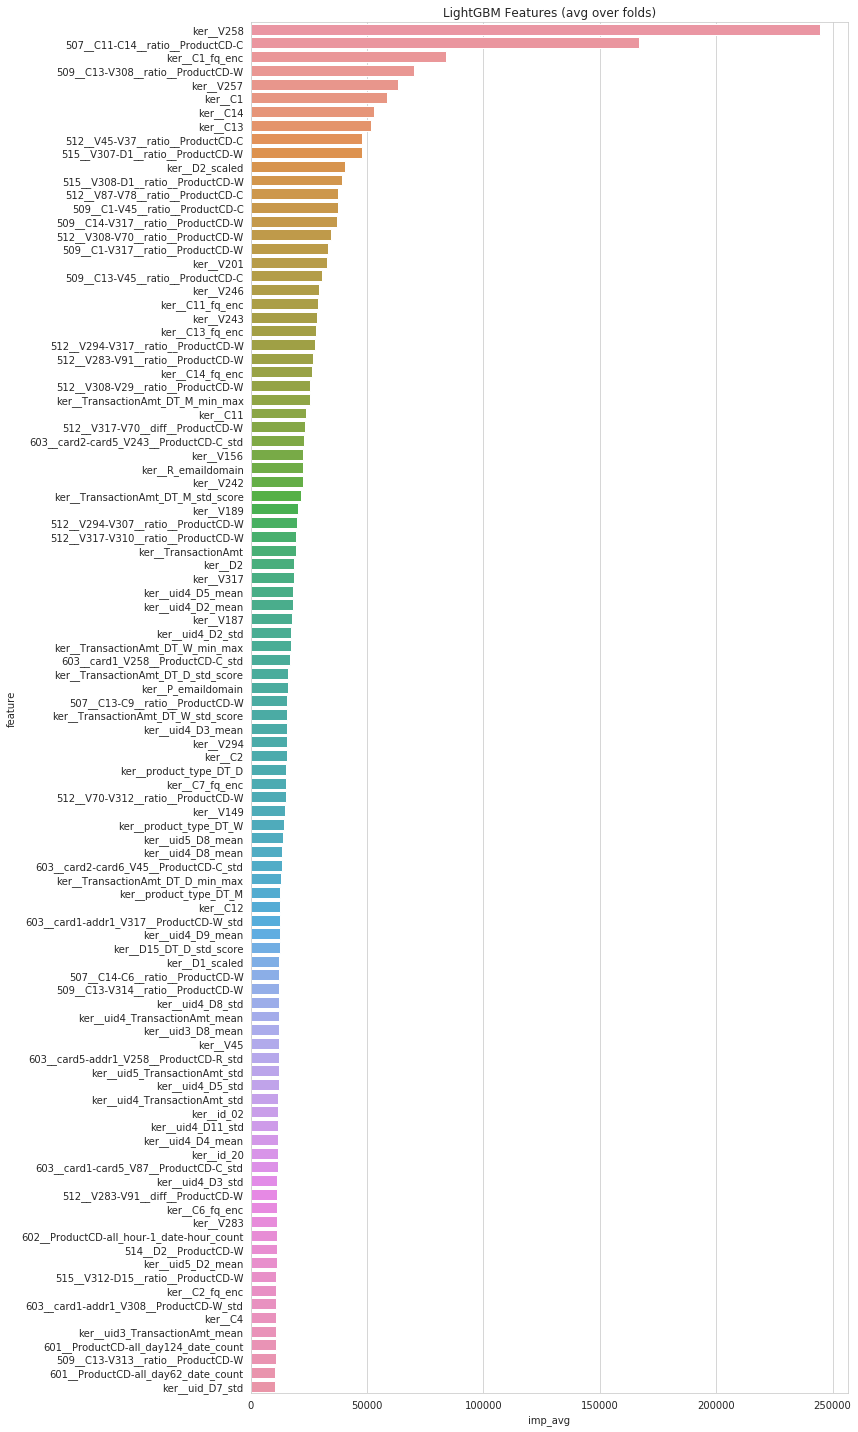

Setup Dataset dim_ml_dataset.


In [3]:
is_submit = [True, False][0]
valid_paths_train = paths_train_feature[:]
valid_paths_test  = paths_test_feature[:]

#========================================================================
# pathの存在チェック。なぜかたびたびFileNotFoundErrorが起きるので,,,
#========================================================================
remove_paths = []
for trn_path, tes_path in zip(valid_paths_train, valid_paths_test):
    if os.path.exists(trn_path) and os.path.exists(tes_path):
        pass
    else:
        remove_paths.append(trn_path)
        remove_paths.append(tes_path)
for path in remove_paths:
    if path.count('train'):
        valid_paths_train.remove(path)
        print(f'remove {path}')
    elif path.count('test'):
        valid_paths_test.remove(path)
        print(f'remove {path}')

df_feat_train = parallel_load_data(valid_paths_train)
df_feat_test  = parallel_load_data(valid_paths_test)

col_drops = eval_check_feature(df_feat_train, df_feat_test)

tmp_train = df_train.join(df_feat_train)
tmp_test = df_test.join(df_feat_test)

#========================================================================
# Train Test で片方に存在しないFeatureを除外
#========================================================================
diff_cols = list(set(tmp_train.columns) - set(tmp_test.columns))

for col in list(set(diff_cols)):
    from_dir = 'valid'
    to_dir = 'valid_trush'
    move_feature([col], from_dir, to_dir)
tmp_train.drop(diff_cols, axis=1, inplace=True)
print(f"  * Diff Features: {len(diff_cols)}")

# same_user_path = '../output/same_user_pattern/20190901_user_ids_share.csv'
# same_user_path = '../output/same_user_pattern/0902__same_user_id__card_addr_pemail_M.csv'
group_kfold_path = '../input/0908_ieee__DT-M_GroupKFold.gz'
group = read_pkl_gzip(group_kfold_path)
tmp_train[COLUMN_GROUP] = group


#========================================================================
# Features elimination 
#==============================================================
# from scipy.stats import ks_2samp
# features_check = []
# columns_to_check = set(list(tmp_train)).difference(COLUMNS_IGNORE)
# for i in columns_to_check:
#     features_check.append(ks_2samp(tmp_test[i], tmp_train[i])[1])

# features_check = pd.Series(features_check, index=columns_to_check).sort_values() 
# features_discard = list(features_check[features_check==0].index)
# print(features_discard)
# tmp_train.drop(features_discard, axis=1, inplace=True)
# tmp_test.drop(features_discard, axis=1, inplace=True)


model_type = "lgb"
params = {
#     'n_jobs': 64,
    'n_jobs': 40,
    'seed': 1208,
    'n_splits': 6,
    'metric': 'auc',
    'model_type': model_type,
    'objective': 'binary',
    'fold': ['stratified', 'group'][1],
    'num_leaves': 2**8-1,
    'max_depth': -1,
    'subsample': 0.9,
    'subsample_freq': 1,
    'colsample_bytree' : 0.20,
    'lambda_l1' : 0.1,
    'lambda_l2' : 1.0,
    'learning_rate' : 0.1,
    "early_stopping_rounds": 50,
}

if is_submit:
    params['learning_rate'] = 0.01
    params["early_stopping_rounds"] = 100

list_result_feim = eval_train(
    logger,
    tmp_train,
    Y,
    tmp_test,
    COLUMN_GROUP,
    model_type,
    params,
    is_adv=[True, False][1],
    is_viz=[True, False][0],
)

In [7]:
# feim = read_pkl_gzip('../output/feature_importances/20190912_0822__CV0-9456328818476605__feature726.gz')
# pd.set_option('max_rows', 200)
feim = list_result_feim[0]
# idx = [idx for idx in feim.index if idx.count('522_')]
# feim = feim.loc[idx]
feim.tail(100)
# feim.loc[[i for i in feim.index if i.count('browser')]]

,imp_fold1,imp_fold2,imp_fold3,imp_fold4,imp_fold5,imp_fold6,imp_avg
feature,,,,,,,
ker__V185,132.379105,366.116730,191.434708,269.385345,328.833099,424.292969,285.407013
ker__V132,497.951965,352.127136,213.687271,275.510071,153.442780,183.746414,279.410919
ker__V125,142.520309,373.829956,467.918915,235.362366,69.895668,357.985687,274.585480
ker__V3,381.708862,317.188141,299.153534,115.783470,254.322906,215.921570,264.013062
ker__V135,180.956100,401.599304,376.593323,186.514664,195.121643,241.052246,263.639557
ker__id_24,180.006729,215.240799,276.105347,277.674530,297.849945,331.295197,263.028778
ker__V182,182.900604,210.494003,264.418915,333.750031,327.562469,239.703247,259.804871
ker__V301,214.697479,163.128174,486.558014,221.140213,263.363495,184.206879,255.515732
ker__V7,289.022156,349.526825,241.812988,61.529423,234.551025,353.365021,254.967896


In [8]:
# feim = read_pkl_gzip('../output/feature_importances/20190909_2324__CV0-9467296784440689__feature552.gz')
for feature_name in feim[feim['imp_avg']<50].index:
# for feature_name in feim.index:
    if not feature_name.count('ker'):
        continue

    if feature_name.count('raw'):
        from_dir = 'raw_use'
        to_dir = 'raw_trush'
#         from_dir = 'raw_trush'
#         to_dir = 'raw_use'
    else:
        from_dir = 'org_use'
        to_dir = 'org_trush'
#         from_dir = 'org_trush'
#         to_dir = 'org_use'
    from_dir = 'product_feature'
    from_dir = 'org_use'
#     to_dir = 'valid_trush'
#     to_dir = 'check_trush'
#     to_dir = 'valid'
    to_dir = 'kernel'
    try:
        move_feature([feature_name], from_dir, to_dir)
    except FileNotFoundError:
        print(feature_name)